<a href="https://colab.research.google.com/github/pinei/ciencia-dados-python/blob/main/imersao-dados/Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Amostra de dados do ENEM (dados originais disponiveis em http://portal.inep.gov.br/microdados)
fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
dados_df = pd.read_csv(fonte)  # type: <class 'pandas.core.frame.DataFrame'>

In [23]:
# Primeiros registros do dataframe
dados_df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [41]:
# Dimensões do dataframe
(dados_rows, dados_cols) = dados_df.shape # type: tuple
print(str(dados_rows) + ":" + str(dados_cols))

127380:136


In [42]:
# Todos os Estados da amostra
siglas_uf_array = dados_df["SG_UF_RESIDENCIA"].unique() # type: numpy.ndarray
siglas_uf

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [43]:
# Contagem de registros por Estado (automaticamente ordena pelo valor da contagem)
dados_df["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

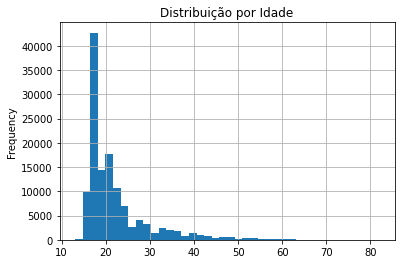

In [ ]:
# Distribuição por Idade usando o gráfico de Histograma
dados["NU_IDADE"].plot(kind='hist', bins=40, grid=True, title='Distribuição por Idade')

In [50]:
# Contagem de registros por Idade ordenando pela Idade
idade_series = dados_df["NU_IDADE"].value_counts().sort_index() # type: pandas.core.series.Series
idade_series

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

In [64]:
# Total de registros com idade
total = dados['NU_IDADE'].count()
# Contagem por Idade
idade_df = pd.DataFrame(idade_series)
# Percentual
idade_df['%'] = ((idade_df['NU_IDADE']/total)*100).round(3)
idade

,NU_IDADE,%
13,4,0.003
14,141,0.111
15,2009,1.577
16,7830,6.147
17,21256,16.687
...,...,...
73,2,0.002
75,2,0.002
76,1,0.001
77,1,0.001


In [72]:
# Forma mais fácil direta de obter os percentuais
dados['NU_IDADE'].value_counts(normalize=True).sort_index() * 100

13     0.003140
14     0.110692
15     1.577171
16     6.146962
17    16.687078
        ...    
73     0.001570
75     0.001570
76     0.000785
77     0.000785
82     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

In [52]:
# Contagem de registros por Idade, filtrando antes para considerar apenas os Treineiros
dados_df.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

In [111]:
# Estados dos inscritos com 13 anos
dados_df.query("NU_IDADE == 13 and IN_TREINEIRO == 0")["SG_UF_RESIDENCIA"].value_counts()

AP    1
SP    1
BA    1
MT    1
Name: SG_UF_RESIDENCIA, dtype: int64

In [53]:
# Estatísticas de algumas das Notas
# Ciências da Natureza, Ciências Humanas, Matemática, Linguagens e Codigos, Redação
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados_df[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [54]:
# Quantil (indica que 90% da amostra teve nota menor)
dados_df["NU_NOTA_CN"].quantile(0.9)

582.2

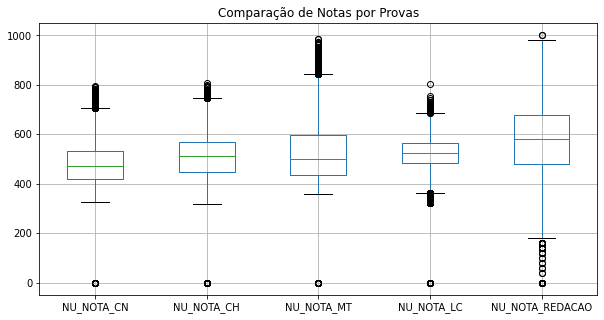

In [66]:
dados_df[provas].plot.box(grid = True, figsize=(10,5), title='Comparação de Notas por Provas')

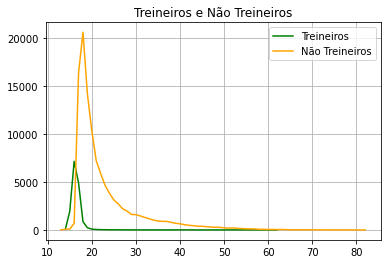

In [81]:
# Inscritos por Idade (Treineiros x Não Treineiros)
treineiros_series = dados_df.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()
nao_treineiros_series = dados_df.query("IN_TREINEIRO != 1")["NU_IDADE"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.plot(treineiros_series, color='green', label='Treineiros')
plt.plot(nao_treineiros_series, color='orange', label='Não Treineiros')
plt.grid(True)
plt.title("Treineiros e Não Treineiros")
plt.legend()

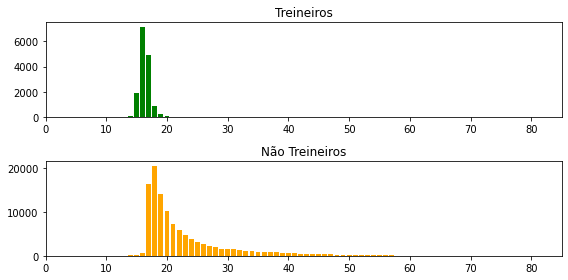

In [116]:

plt.figure(figsize=(8, 4))

plt.subplot(211) # rows, cols, index
plt.bar(treineiros_series.index, treineiros_series.values, color='green')
plt.title('Treineiros')
plt.xlim(0, 85)

plt.subplot(212)
plt.bar(nao_treineiros_series.index, nao_treineiros_series.values, color='orange')
plt.title('Não Treineiros')
plt.xlim(0, 85)
plt.tight_layout()
plt.show()

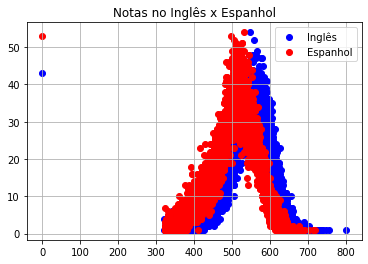

In [125]:
# Notas de Linguagens e Codigos (Inglês x Espanhol)
ingles_series = dados_df.query("TP_LINGUA == 0")["NU_NOTA_LC"].value_counts().sort_index()
espanhol_series = dados_df.query("TP_LINGUA == 1")["NU_NOTA_LC"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.scatter(ingles_series.index, ingles_series.values, color='blue', label='Inglês', alpha=1)
plt.scatter(espanhol_series.index, espanhol_series.values, color='red', label='Espanhol', alpha=1)
plt.grid(True)
plt.title("Notas no Inglês x Espanhol")
plt.legend()

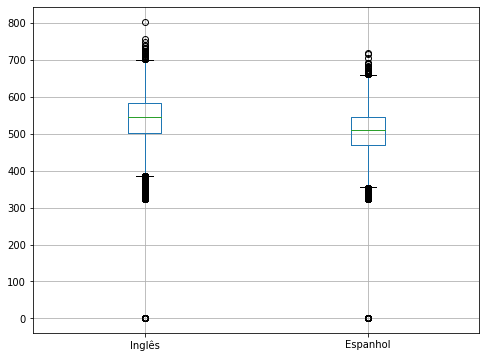

In [100]:
# Notas de Linguagens e Codigos (Inglês x Espanhol) (v2)
notas = {
  'Inglês': dados.query('TP_LINGUA == 0')['NU_NOTA_LC'],
  'Espanhol': dados.query('TP_LINGUA == 1')['NU_NOTA_LC']
}

notas_df = pd.DataFrame(notas)
notas_df.plot.box(figsize= (8, 6), grid = True)